In [1]:
# import librosa
from IPython.display import Audio

In [2]:
samples = {
    'pd06_na': "data/no-noise/sim_NM_na_nn_pd06_h16_10.wav", # so for Christian is run in of light weight 
    'pd06_amp': "data/no-noise/sim_NM_amp_nn_pd06_h16_10.wav", # the sofa cushion is red and of light weight 
    'pd06_70db': "data/sim_production_audio_rescaled_70dB/sim_pd06_habitual_nm_h16_10_ch1_70db.wav", # the sofa cushion is red and of light weight.
    'oc06_na': "data/no-noise/sim_NM_na_nn_oc06_h16_10.wav", # the sofa cushion is rad N. of light weight 
    'oc06_amp': "data/no-noise/sim_NM_amp_nn_oc06_h16_10.wav", # the sofa cushion is red N. of light weight 
    'oc06_70db': "data/sim_production_audio_rescaled_70dB/sim_oc06_habitual_nm_h16_10_ch1_70db.wav", # the sofa cushion is red N. of light weight.
}

In [3]:
Audio(samples['pd06_70db'])  # 70db Audio: the sofa cushion is red and of light weight.

In [4]:
Audio(samples['pd06_amp'])  # Minibuddy Amplified no noise Audio: the sofa cushion is red and of light weight 

In [5]:
Audio(samples['pd06_na'])  # No Amplified no noise Audio: so for Christian is run in of light weight 

In [6]:
Audio(samples['oc06_70db'])  # 70db Audio: the sofa cushion is red and of light weight.

In [7]:
import librosa

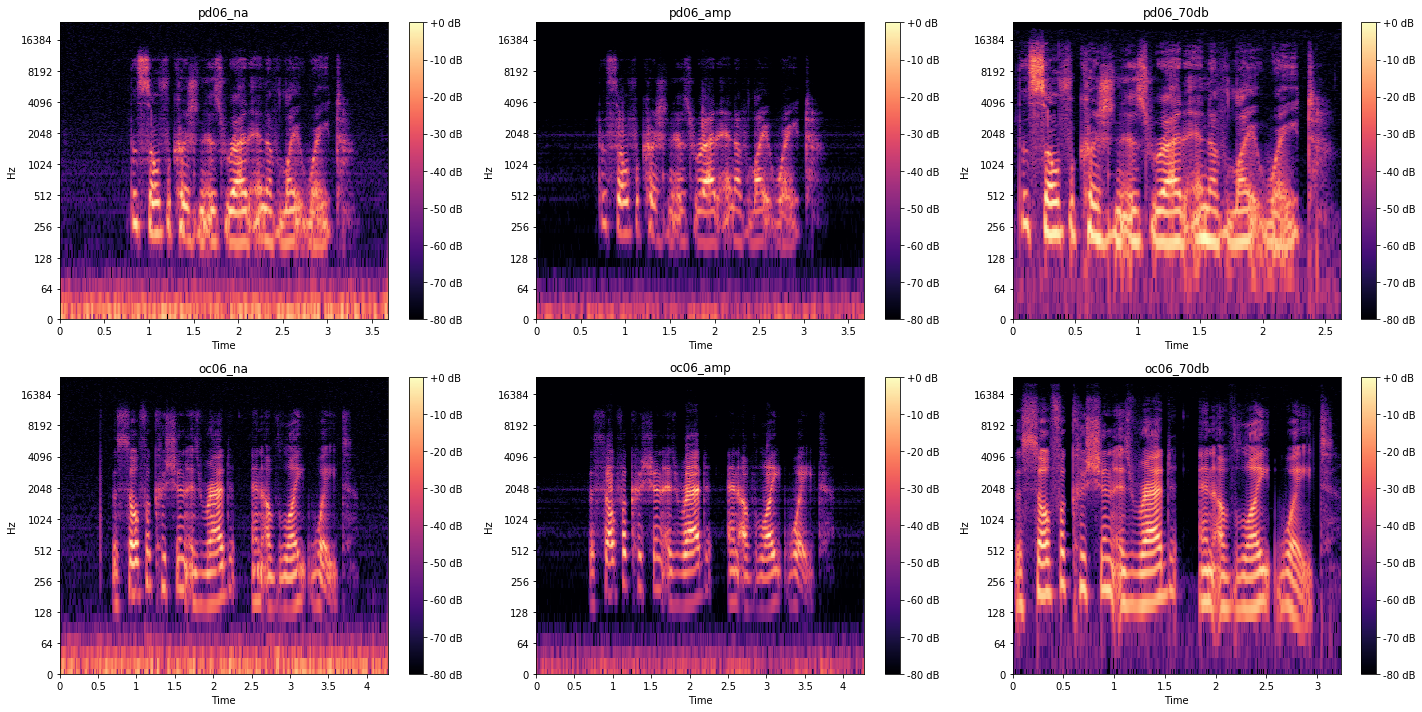

In [9]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load four audio files
titles = ["pd06_na", 'pd06_amp', 'pd06_70db', 'oc06_na', 'oc06_amp', 'oc06_70db']
filenames = [samples[title] for title in titles]

# Create a new figure
plt.figure(figsize=(20, 10))

for i in range(6):
    # Load the audio file
    y, sr = librosa.load(filenames[i], sr=48000)

    # Compute the spectrogram
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

    # Create a subplot and display the spectrogram
    plt.subplot(2, 3, i+1)
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(titles[i])

plt.tight_layout()
plt.show()

In [34]:
def psd(filename):
    y, sr = librosa.load(filename, sr=48000)
    # Compute the FFT
    fft = np.fft.fft(y)

    # Compute the power spectral density, a measure of power at each frequency
    psd = np.abs(fft) ** 2

    # Compute the frequencies corresponding to the PSD values
    freq = np.fft.fftfreq(len(psd), 1 / sr)

    # Only keep the positive frequencies (since the spectrum is symmetric)
    i = freq > 0
    freq, psd = freq[i], psd[i]

    # Plot the power spectral density as a function of frequency
    plt.figure(figsize=(10, 4))
    plt.loglog(freq, psd)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power Spectral Density')
    plt.title('Frequency content of the signal')
    plt.tight_layout()
    plt.show()

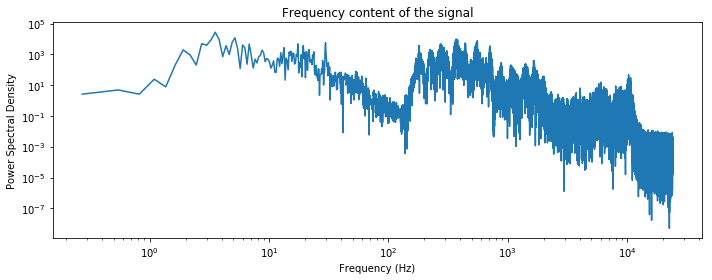

In [35]:
psd(samples['pd06_na'])

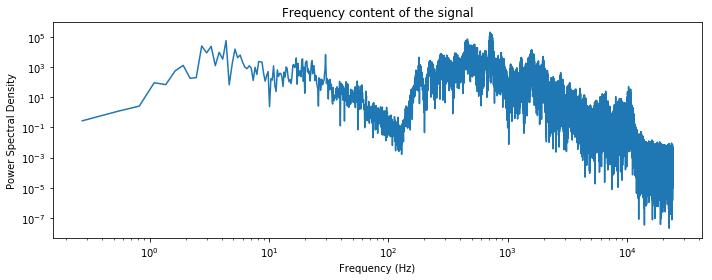

In [36]:
psd(samples['pd06_amp'])

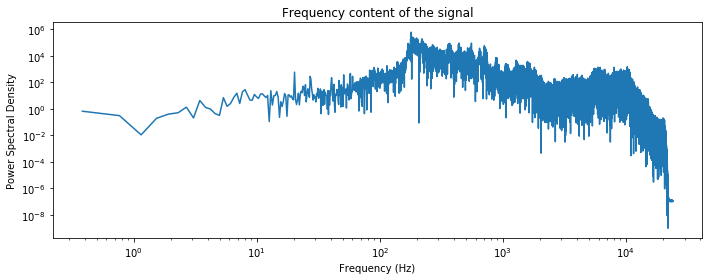

In [37]:
psd(samples['pd06_70db'])

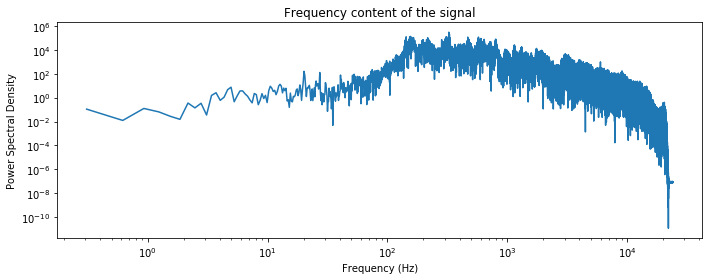

In [38]:
psd(samples['oc06_70db'])

In [39]:
def find_formant(filename):
    # Load the audio file
    # filename = 'your_audio_file.wav'  # Replace with your file path
    y, sr = librosa.load(filename, sr=48000)

    # Apply pre-emphasis filter
    pre_emphasis = 0.97
    y = np.append(y[0], y[1:] - pre_emphasis * y[:-1])

    # Frame the signal into short frames
    frame_size = int(sr * 0.025)
    num_frames = len(y) // frame_size

    frames = np.zeros((num_frames, frame_size))

    for i in range(num_frames):
        frames[i, :] = y[i*frame_size : (i+1)*frame_size]

    # Compute the LPC coefficients for each frame
    order = 2 + sr // 1000
    lpc_coeffs = np.zeros((num_frames, order+1))

    for i in range(num_frames):
        lpc_coeffs[i, :] = librosa.lpc(frames[i, :], order) # [num_frames, order+1]

    # Get formant frequencies for each frame
    formants = np.zeros((num_frames, order))  # (128, 50)

    for i in range(num_frames):
        roots = np.roots(lpc_coeffs[i, :])  #  roots represent the resonant frequencies (or formants)
        roots = [root for root in roots if np.imag(root) >= 0 and np.abs(root) > 0.95 and np.abs(root) < 1.05]
        freqs = sorted(np.arctan2(np.imag(roots), np.real(roots)))
        formants[i, :len(freqs)] = [freq * sr / (2 * np.pi) for freq in freqs]

        # formants[i, :] = [freq * sr / (2 * np.pi) for freq in freqs]

    # Average formant frequencies across frames
    mean_formants = np.mean(formants, axis=0)
    return formants, mean_formants

    #　print('Average formant frequencies: ', mean_formants)

In [21]:
formants, mean_formants = find_formant(samples['pd06_70db'])

In [22]:
formants.shape  # 128 frames, 50 order

(104, 50)

In [23]:
mean_formants

array([  520.45496947,  1810.22410339,  3173.4620072 ,  4515.15274376,
        5687.35292371,  6870.57879149,  8193.79400436,  9332.62685729,
       10432.45785983, 11424.49908155, 12679.30558161, 13752.16113576,
       14774.37988942, 15801.62685166, 16753.51808565, 17719.8183021 ,
       18561.85802349, 18527.82676823, 17950.77212199, 15825.40850281,
       13139.80653646,  8875.73919334,  3862.92303953,  1229.23581009,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ])

In [24]:
import numpy as np
from scipy.signal import butter, filtfilt
import librosa

# Load the audio wave
def amplify(filename, mean_formants):
    audio, sr = librosa.load(filename, sr=48000)

    energy_factor = 3
    padding_length = 0.1

    # Calculate the number of samples for padding
    padding_samples = int(padding_length * sr)

    # Apply padding to the audio signal
    padded_audio = np.pad(audio, (padding_samples, padding_samples), mode='constant')

    # Modify the amplitudes around each formant
    for formant in mean_formants:
        if formant !=0:
            # Define the bandpass filter for the formant frequency range
            lowcut = (formant - 100) if (formant-200>0) else formant   # Adjust as needed
            highcut = (formant + 100)  # Adjust as needed
            # print (lowcut, highcut)
            order = 4  # Filter order
            b, a = butter(order, [lowcut, highcut], btype='band', fs=sr)

            # Apply the bandpass filter to the audio wave
            filtered_audio = filtfilt(b, a, padded_audio)

            # Remove the padding from the filtered audio
            filtered_audio = filtered_audio[padding_samples:-padding_samples]
            # filtered_audio = filtfilt(b, a, audio)

            # Calculate the amplification factor for the formant
            amplification_factor = energy_factor * 1

            # Scale the amplitudes within the formant frequency range
            filtered_audio *= amplification_factor

            # Add the modified formant amplitudes to the original audio
            audio += filtered_audio
            # print (audio)
    librosa.output.write_wav(filename[:-4]+"_enhanced.wav", audio, sr)

In [42]:
amplify(samples['pd06_na'], mean_formants)

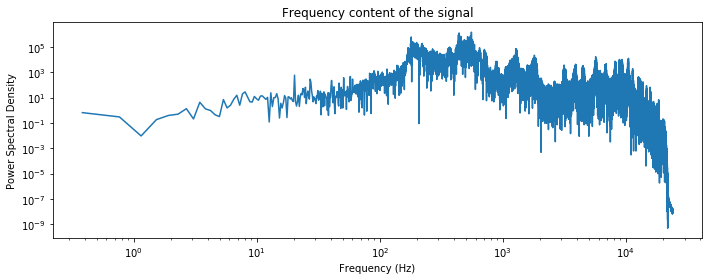

In [43]:
psd(samples['pd06_70db'][:-4]+"_enhanced.wav")

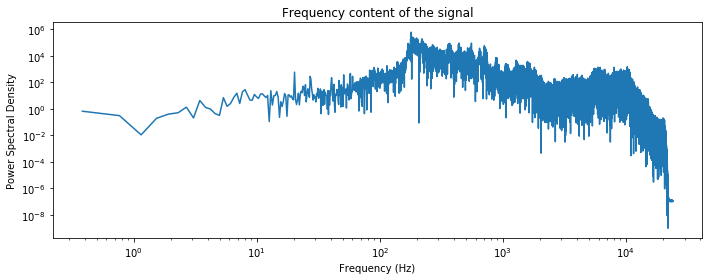

In [41]:
psd(samples['pd06_70db'])

In [150]:
def enhance_by_formant(filename):
    formants, mean_formants = find_formant(filename)
    # print (mean_formants)
    amplify(filename, mean_formants)

In [156]:
pd06_na = "data/no-noise/sim_NM_na_nn_pd06_h16_10.wav" # so for Christian is run in of light weight 
pd06_amp = "data/no-noise/sim_NM_amp_nn_pd06_h16_10.wav" # the sofa cushion is red and of light weight 
pd06_70db = "data/sim_production_audio_rescaled_70dB/sim_pd06_habitual_nm_h16_10_ch1_70db.wav" # the sofa cushion is red and of light weight.

enhance_by_formant(pd06_70db)
enhance_by_formant(pd06_na)

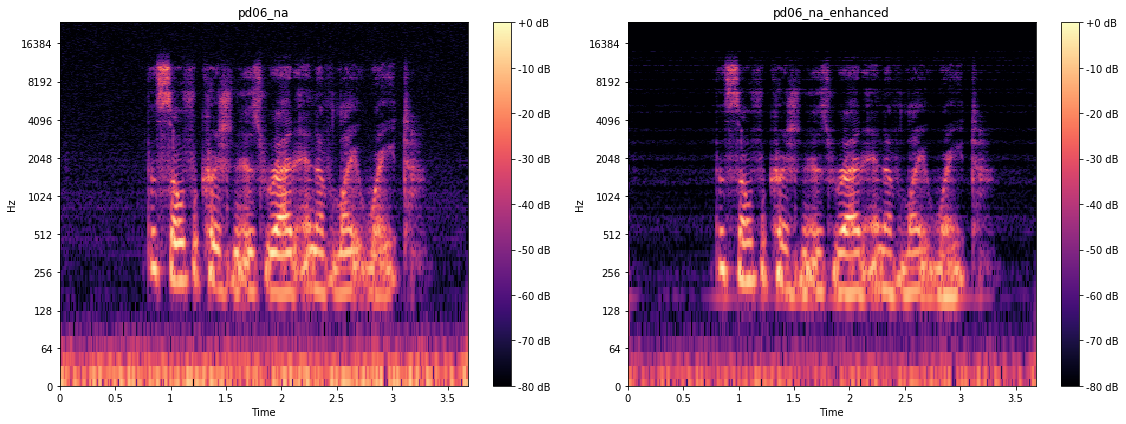

In [152]:
pd06_na_enhanced = "data/no-noise/sim_NM_na_nn_pd06_h16_10_enhanced.wav"
filenames = [pd06_na, pd06_na_enhanced]
titles = ["pd06_na", 'pd06_na_enhanced']

# Create a new figure
plt.figure(figsize=(16, 6))

for i in range(2):
    # Load the audio file
    y, sr = librosa.load(filenames[i], sr=48000)

    # Compute the spectrogram
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

    # Create a subplot and display the spectrogram
    plt.subplot(1, 2, i+1)
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(titles[i])

plt.tight_layout()
plt.show()

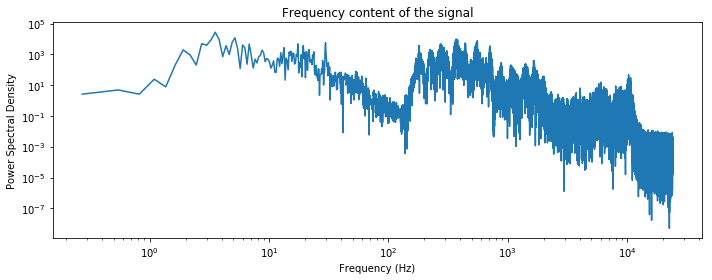

In [157]:
psd(pd06_na)

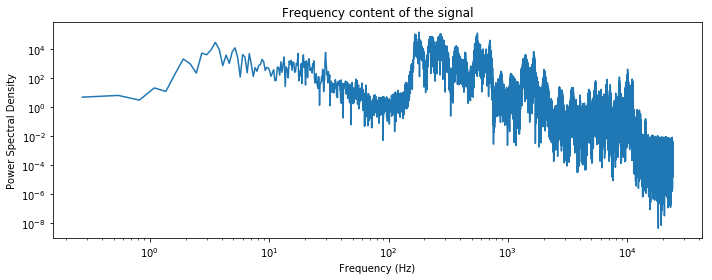

In [158]:
psd(pd06_na_enhanced)